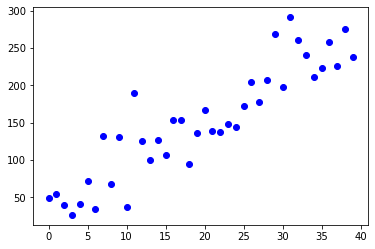

The trend line that best matches the data without errorbars is:   
5.865 x + 37.15


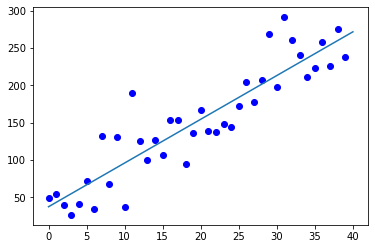

The trend line that best matches the data with errorbars is:   
5.865 x + 37.15


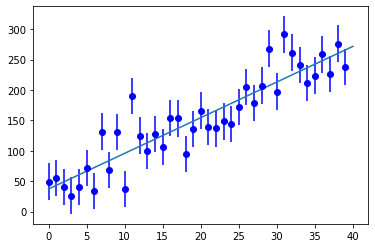

In [178]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from astropy.io import ascii
import random

#read in the data
data = ascii.read("datav3.txt")
#print(data)
#print(data["x"][0])

#plot all the data points
plt.plot(data["x"][:],data["y"][:], 'bo')
plt.show()

#generate a trendline
z=np.polyfit(data["x"][:],data["y"][:],1)
p=np.poly1d(z)
print("The trend line that best matches the data without errorbars is: ",p)

#plot data and new trendline
plt.plot(data["x"][:],data["y"][:], 'bo')
x=np.linspace(0.0,40.0,100)
plt.plot(x,p(x))
plt.show()

#plot data and errorbars
plt.errorbar(data["x"][:],data["y"][:],data["dy"][:], fmt='bo')

#found this function online at "http://www.ap.smu.ca/~agolob/phys2300/blog/climate-change/"
def OLSfit(x, y, dy=None):
    """Find the best fitting parameters of a linear fit to the data through the
    method of ordinary least squares estimation. (i.e. find m and b for
    y = m*x + b)

    Args:
        x: Numpy array of independent variable data
        y: Numpy array of dependent variable data. Must have same size as x.
        dy: Numpy array of dependent variable standard deviations. Must be same
            size as y.

    Returns: A list with four floating point values. [m, dm, b, db]
    """
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) -
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) -
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x / dy**2) / denom)
    return([m, dm, b, db])
#find and plot error trendline
z2=OLSfit(data["x"][:],data["y"][:],data["dy"][:])
#print(z,z2)
p2=np.poly1d([z2[0],z2[2]])#m and b from OLS
print("The trend line that best matches the data with errorbars is: ",p2)
#at this point i noticed that p and p2 are identical, but z and z2 are near identical. 
#Either this OLS function doesnt work right or, more likely, the error doesnt make that much difference.
plt.plot(x,p2(x))
plt.show()

#in hindsight I probably should have broken this up into several cells

In [179]:
#function that adds a trendline to the plot
def errorFit(x, y, dy):
    zf=OLSfit(x,y,dy)
    pf=np.poly1d([zf[0],zf[2]])#m and b from OLS
    plt.plot(x,pf(x))

In [180]:
#lets put our functions for calculating pi in this cell block

def genPoint(x,y):
    #add two random numbers between -1 and 1
    x.append(retRan())
    y.append(retRan())

#return Random
def retRan():
    #this was alot more complicated but then I found uniform which was exactly what I needed
    r=random.uniform(-1,1)
    return r

def findDis(x,y):
    #x and y are single elements
    return(math.sqrt(x**2+y**2))

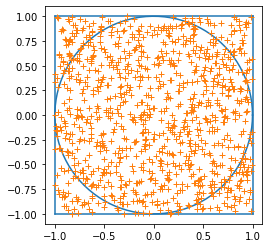

3.104


In [181]:
#time to calculate pi

def getPi(numElements, showPlot):
    numPoints=numElements
    random.seed(random.random())
    #lets make a 2x2 square centered on origin so inside/outside calculation is easy
    if(showPlot):
        plt.axes()
        line = plt.Line2D((-1, -1), (-1, 1), lw=1.5)
        plt.gca().add_line(line)
        line = plt.Line2D((-1, 1), (1, 1), lw=1.5)
        plt.gca().add_line(line)
        line = plt.Line2D((1, 1), (1, -1), lw=1.5)
        plt.gca().add_line(line)
        line = plt.Line2D((1, -1), (-1, -1), lw=1.5)
        plt.gca().add_line(line)
        plt.axis('scaled')
        #plot the circle
        theta = np.linspace(0, 2*np.pi, 100)
        rc= 1
        xc = rc*np.cos(theta)
        yc = rc*np.sin(theta)
        plt.plot(xc,yc)
    #quick reminder that all ploting is purely visual
    x = []
    y = []
    #for loop that determins how many random points we plot
    for i in range(1,(numPoints+1),1):
        genPoint(x,y)
    if(showPlot):
        plt.plot(x[:],y[:],'+')
        plt.show()
    #now for each point, we see if the distance to origin is greater than 1
    counter=0
    for i in range(0,(numPoints),1):
        if(findDis(x[i],y[i])<=1):
            counter+=1
    #counter=numPoints inside the circle, numinside/numtotal should be proportional to pi/4
    myPi=((counter*4)/numPoints)
    return myPi
print(getPi(1000,1))

In [190]:
#comparison function I felt like writing
#use 10 to the power of i for 10 trials and report the number that differs most from np.pi for each magnitude
trials=10
scale=6
f_val=np.zeros(scale)
f_dif=np.zeros(scale)
for i in range(1,scale+1,1):
    for j in range(1,trials+1,1):
        t=getPi(10**i,0)
        #print(t)
        #print(np.pi)
        #print(t-np.pi)
        #print(abs(t-np.pi))
        if((abs(t-np.pi))>(f_dif[i-1])):
            f_val[i-1]=t
            f_dif[i-1]=abs(t-np.pi)
            #print(i,i-1,t,f_val[i-1],f_dif[i-1])
            
#I found that if you want to guarentee it says at least 3.14, you need 1 million test points
        
print("Worst result from each magnitude over",trials, "trials: ", f_val)
print("Largest diff from each magnitude over",trials,"trials: ", f_dif)

Worst result from each magnitude over 10 trials:  [3.6      3.48     3.26     3.1296   3.13524  3.145904]
Largest diff from each magnitude over 10 trials:  [0.45840735 0.33840735 0.11840735 0.01199265 0.00635265 0.00431135]
